In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/crt/ELC.csv"
df = pd.read_csv(file_path)
df

Mounted at /content/drive


,Price,Open,High,Low,Class
0,18800.0,19000.0,19250.0,18800.0,1
1,19150.0,19000.0,19400.0,18850.0,1
2,18900.0,19400.0,19400.0,18800.0,1
3,19350.0,19400.0,19550.0,19100.0,1
4,19350.0,19800.0,19800.0,19250.0,1
...,...,...,...,...,...
1744,19855.5,19929.3,20372.1,19560.2,1
1745,20076.9,20298.3,20298.3,19929.3,1
1746,20298.3,20298.3,20409.1,20150.7,1
1747,20298.3,20446.0,20667.4,19929.3,1


In [3]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df.drop('Class', axis=1))
scaled_features = scaler.transform(df.drop('Class',
                                           axis=1))

df_feat = pd.DataFrame(scaled_features,
                       columns=df.columns[:-1])
df_feat.head()

,Price,Open,High,Low
0,1.172971,1.209417,1.190951,1.239614
1,1.230941,1.209417,1.215348,1.248079
2,1.189534,1.275761,1.215348,1.239614
3,1.264067,1.275761,1.239746,1.290404
4,1.264067,1.342104,1.280408,1.315800


Ratio 7-3

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(scaled_features,
                                       df['Class'],
                                       test_size=0.3)



knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)


print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[273   2]
 [  4 246]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       275
           1       0.99      0.98      0.99       250

    accuracy                           0.99       525
   macro avg       0.99      0.99      0.99       525
weighted avg       0.99      0.99      0.99       525



In [20]:
print(f"Accuraccy Precent: \n {accuracy_score(y_test,pred)*100}\n\n\n")

Accuraccy Precent: 
 98.85714285714286





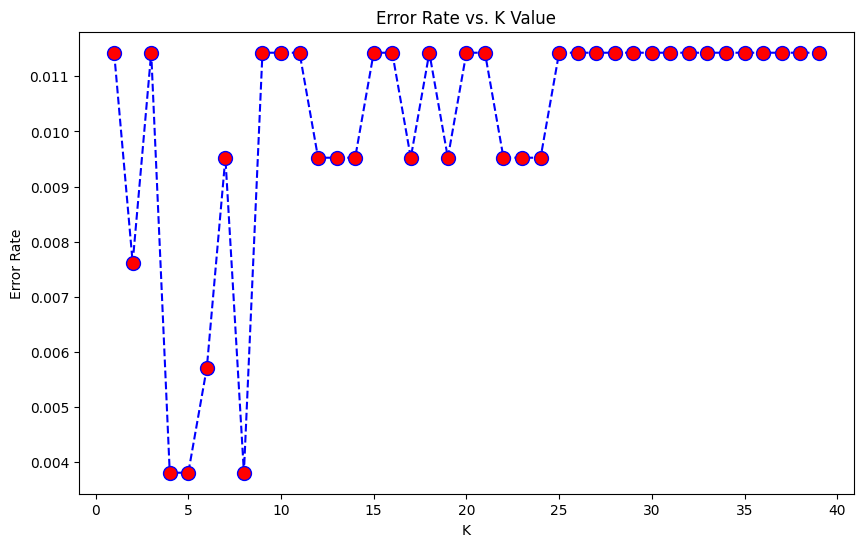

In [17]:
error_rate = []

# Will take some time
for i in range(1, 40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue',
         linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [18]:
# Find the best k value
best_k = np.argmin(error_rate) + 1
print("Best k:", best_k)

Best k: 4


Ratio 8-2

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(scaled_features,
                                       df['Class'],
                                       test_size=0.2)



knn = KNeighborsClassifier(n_neighbors=35)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)


print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[189   0]
 [  1 160]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       189
           1       1.00      0.99      1.00       161

    accuracy                           1.00       350
   macro avg       1.00      1.00      1.00       350
weighted avg       1.00      1.00      1.00       350



In [26]:
print(f"Accuraccy Precent: \n {accuracy_score(y_test,pred)*100}\n\n\n")

Accuraccy Precent: 
 99.71428571428571





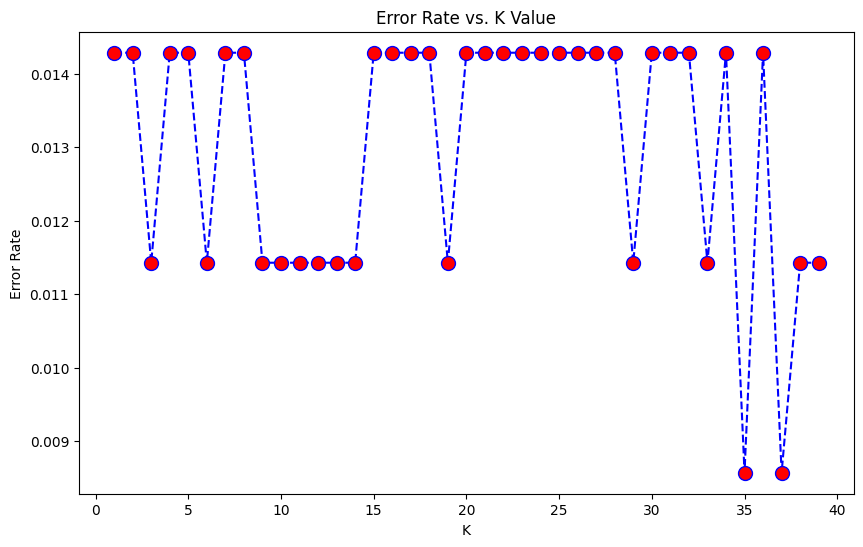

In [23]:
error_rate = []

# Will take some time
for i in range(1, 40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue',
         linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [24]:
# Find the best k value
best_k = np.argmin(error_rate) + 1
print("Best k:", best_k)

Best k: 35


Ratio 9-1

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(scaled_features,
                                       df['Class'],
                                       test_size=0.1)



knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)


print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[97  0]
 [ 1 77]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        97
           1       1.00      0.99      0.99        78

    accuracy                           0.99       175
   macro avg       0.99      0.99      0.99       175
weighted avg       0.99      0.99      0.99       175



In [32]:
print(f"Accuraccy Precent: \n {accuracy_score(y_test,pred)*100}\n\n\n")

Accuraccy Precent: 
 99.42857142857143





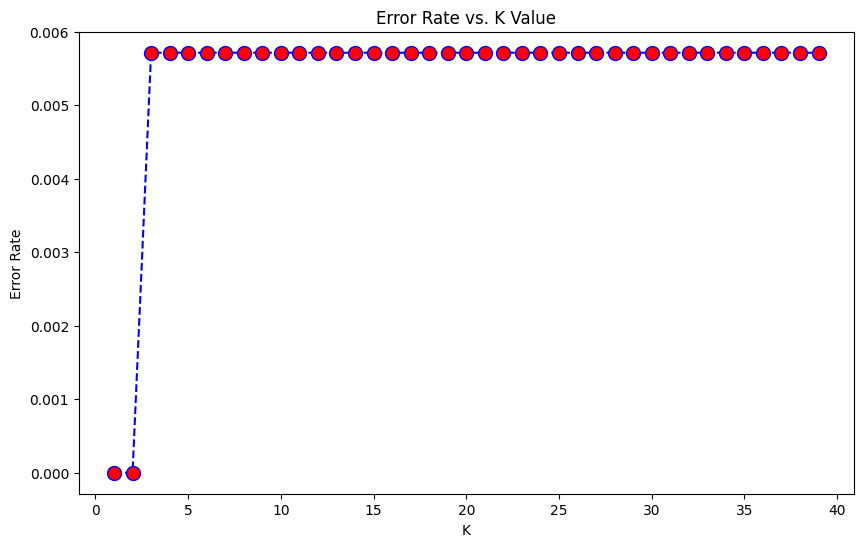

In [29]:
error_rate = []

# Will take some time
for i in range(1, 40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue',
         linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [30]:
# Find the best k value
best_k = np.argmin(error_rate) + 1
print("Best k:", best_k)

Best k: 1
